### Show Mapping Results

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path_mapping_stats = "../../data/mapping_stats_2pass/"

In [3]:
def LogParser(file_path:str) -> pd.DataFrame:
    """Parse out Single Log

    Args:
        file_path (str): path for log file

    Returns:
        pd.DataFrame: a dataframe that stores parsed log data
    """
    
    row_name = file_path.split('/')[-1][:-14]
    
    with open(file_path, 'r') as log:
        cols = []
        rows = []
        
        idx = 0
        while True:
            line = log.readline().strip()  # remove heading and tailing whitespaces
            
            if idx < 5:  # skip first 5 lines (useless info)
                idx += 1
                continue
            
            if not line:  # empty line below 5th line means end of file
                break
            
            if '|' not in line:  # line without '|' means simple informative row
                continue
            
            col, row = line.split('|')
            cols.append(col.strip())  # remove heading and tailing whitespaces
            rows.append(row.strip())  # remove heading and tailing whitespaces
    
    return pd.DataFrame({c:r for c, r in zip(cols, rows)}, index=[row_name])

In [4]:
def MultiLogParser(file_path: str) -> pd.DataFrame:
    """Parse out Multiple Log files=

    Args:
        file_path (str): path where all the log files are in

    Returns:
        pd.DataFrame: a dataframe that contains all the information of log files
    """
    
    res_df = pd.DataFrame()  # empty dataframe
    
    fnames = os.listdir(file_path)
    
    for fname in fnames:
        fpath = os.path.join(file_path, fname)
        res_df = pd.concat([res_df, LogParser(fpath)])
    
    return res_df

In [5]:
mapping_stats = MultiLogParser(path_mapping_stats)
mapping_stats.sort_index(inplace=True)

In [6]:
mapping_stats.head()

,Number of input reads,Average input read length,Uniquely mapped reads number,Uniquely mapped reads %,Average mapped length,Number of splices: Total,Number of splices: Annotated (sjdb),Number of splices: GT/AG,Number of splices: GC/AG,Number of splices: AT/AC,...,Number of reads mapped to too many loci,% of reads mapped to too many loci,Number of reads unmapped: too many mismatches,% of reads unmapped: too many mismatches,Number of reads unmapped: too short,% of reads unmapped: too short,Number of reads unmapped: other,% of reads unmapped: other,Number of chimeric reads,% of chimeric reads
CCI4_1x_4,52412998,201,44523154,84.95%,200.98,27888396,27859414,27644384,212711,13409,...,102305,0.20%,0,0.00%,1566278,2.99%,325180,0.62%,0,0.00%
CCI4_1x_6,64622725,201,52466365,81.19%,200.62,33446588,33400107,33146634,253033,16715,...,109004,0.17%,0,0.00%,4137571,6.40%,574642,0.89%,0,0.00%
CCI4_1x_9,56679431,201,46860370,82.68%,200.81,31128943,31103070,30848081,243706,15129,...,105617,0.19%,0,0.00%,2896910,5.11%,255388,0.45%,0,0.00%
CCI4_3x_2,56709978,201,46177111,81.43%,200.90,29902198,29876398,29631934,236187,12394,...,133055,0.23%,0,0.00%,2876273,5.07%,217958,0.38%,0,0.00%
CCI4_3x_5,56879454,201,47593658,83.67%,200.92,31325761,31299274,31040622,246775,15271,...,142645,0.25%,0,0.00%,2340089,4.11%,201943,0.36%,0,0.00%


In [7]:
mapping_stats_core = mapping_stats[
    ['Uniquely mapped reads %',
     '% of reads mapped to multiple loci',
     '% of reads mapped to too many loci',
     '% of reads unmapped: too short',
     '% of reads unmapped: other']
].copy()

for column in mapping_stats_core.columns:
    mapping_stats_core[column] = mapping_stats_core[column].map(lambda x: float(x[:-1]))

mapping_stats_summary = mapping_stats_core.copy()

mapping_stats_summary.columns = [
    'uniquely_mapped',
    'multiple_loci',
    'too_many_loci',
    'too_short_loci',
    'other_reason'
]

mapping_stats_summary['multi_mapped'] = mapping_stats_summary['multiple_loci'] + mapping_stats_summary['too_many_loci']
mapping_stats_summary['unmapped'] = mapping_stats_summary['too_short_loci'] + mapping_stats_summary['other_reason']

mapping_stats_summary = mapping_stats_summary.drop(['multiple_loci', 
                                                    'too_many_loci',
                                                    'too_short_loci',
                                                    'other_reason'],
                                                   axis=1)

mapping_stats_summary.head()

,uniquely_mapped,multi_mapped,unmapped
CCI4_1x_4,84.95,11.45,3.61
CCI4_1x_6,81.19,11.52,7.29
CCI4_1x_9,82.68,11.77,5.56
CCI4_3x_2,81.43,13.11,5.45
CCI4_3x_5,83.67,11.86,4.47


In [8]:
mapping_stats_summary_sorted = mapping_stats_summary.sort_values(by='uniquely_mapped', ascending=False)
mapping_stats_summary_sorted.head(), mapping_stats_summary_sorted.tail(10)

(              uniquely_mapped  multi_mapped  unmapped
 CCI4_1x_4               84.95         11.45      3.61
 CCI4_3x_5               83.67         11.86      4.47
 HCC_3x_T_14             83.51         10.92      5.57
 HCC_3x_AT_14            83.17         10.27      6.56
 HCC_3x_T_9              82.81         11.24      5.95,
              uniquely_mapped  multi_mapped  unmapped
 HCC_1x_AT_2            80.09         14.92      4.99
 NASH_11                80.00         14.48      5.52
 HCC_3x_AT_7            79.17         14.66      6.17
 NCD_3                  79.05         12.97      7.98
 HCC_1x_AT_8            78.75         16.62      4.63
 NASH_3                 78.47         13.07      8.46
 HCC_1x_T_12            78.16         12.22      9.62
 NASH_10                76.08         13.31     10.61
 NCD_5                  75.98         12.90     11.12
 NCD_4                  74.40         15.45     10.15)

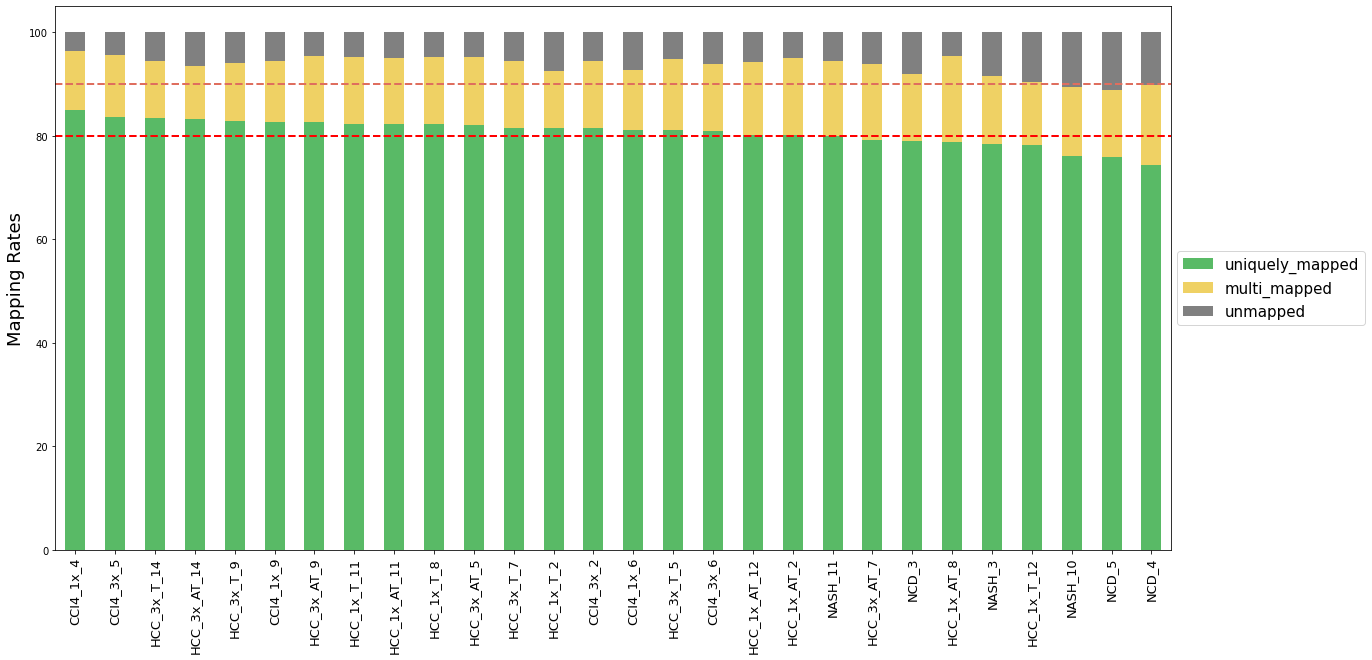

In [107]:
plot = mapping_stats_summary_sorted.plot(kind='bar', stacked=True, color=['#59BA66', '#EFD164', 'grey'], figsize=(20, 10))
plot.axhline(90, color='#DF6E5E', linewidth=2, linestyle='--')
plot.axhline(80, color='red', linewidth=2, linestyle='--')
plt.xticks(fontsize=13)
plt.ylabel("Mapping Rates", fontsize=18)
plt.legend(bbox_to_anchor=(1.005, 0.55), loc='upper left', borderaxespad=0, fontsize=15);

### Show Sample Quality

In [10]:
import numpy as np

path_rsem_result = "../../data/rsem_result/"

In [76]:
def CountExtractor(file_path: str) -> list:
    """Extract count values from rsem results

    Args:
        file_path (str): a path where all the rsem results are in

    Returns:
        list: a list containing dataframes of expected_count, tpm, fpkm
    """
    
    cnt_df = pd.DataFrame()
    tpm_df = pd.DataFrame()
    fpkm_df = pd.DataFrame()
    
    rsem_results = os.listdir(file_path)
    
    first = True
    for rsem in rsem_results:
        temp = pd.read_csv(os.path.join(file_path, rsem), sep='\t')
        temp.index = temp['gene_id']
        
        if first:
            first = False
        else:
            if all(temp.index != cnt_df.index):
                print("Error, Index not matching!!\n")
                break
        
        name = rsem[:-14]
        
        cnt_df[name] = temp['expected_count']
        tpm_df[name] = temp['TPM']
        fpkm_df[name] = temp['FPKM']

        cnt_df = cnt_df.transpose().sort_index(ascending=True).transpose()
        tpm_df = tpm_df.transpose().sort_index(ascending=True).transpose()
        fpkm_df = fpkm_df.transpose().sort_index(ascending=True).transpose()

    return [cnt_df, tpm_df, fpkm_df, temp['length']]

In [77]:
cnt, tpm, fpkm, length = CountExtractor(path_rsem_result)

In [78]:
length.head()

gene_id
ENSMUSG00000000001.5     3262.00
ENSMUSG00000000003.16     799.50
ENSMUSG00000000028.16    1860.91
ENSMUSG00000000031.17    2072.07
ENSMUSG00000000037.18    2094.78
Name: length, dtype: float64

In [79]:
tpm.head()

,CCI4_1x_4,CCI4_1x_6,CCI4_1x_9,CCI4_3x_2,CCI4_3x_5,CCI4_3x_6,HCC_1x_AT_11,HCC_1x_AT_12,HCC_1x_AT_2,HCC_1x_AT_8,...,HCC_3x_T_14,HCC_3x_T_5,HCC_3x_T_7,HCC_3x_T_9,NASH_10,NASH_11,NASH_3,NCD_3,NCD_4,NCD_5
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSMUSG00000000001.5,21.00,25.47,17.09,15.14,18.37,17.15,19.52,18.38,16.10,17.09,...,27.03,22.32,22.94,23.17,21.18,19.25,22.09,22.51,15.13,19.53
ENSMUSG00000000003.16,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ENSMUSG00000000028.16,0.90,0.81,0.27,0.41,1.24,0.68,0.62,0.80,0.34,0.57,...,0.64,0.70,0.69,0.71,0.41,0.47,0.39,0.38,0.63,0.45
ENSMUSG00000000031.17,0.83,32.93,1.95,0.45,1.12,0.53,14.19,9.09,36.78,3.13,...,126.38,53.51,13.31,123.22,0.89,3.30,0.48,0.08,0.08,0.00
ENSMUSG00000000037.18,0.08,0.04,0.13,0.02,0.14,0.05,0.01,0.06,0.04,0.01,...,0.09,0.05,0.04,0.05,0.00,0.00,0.01,0.00,0.00,0.00


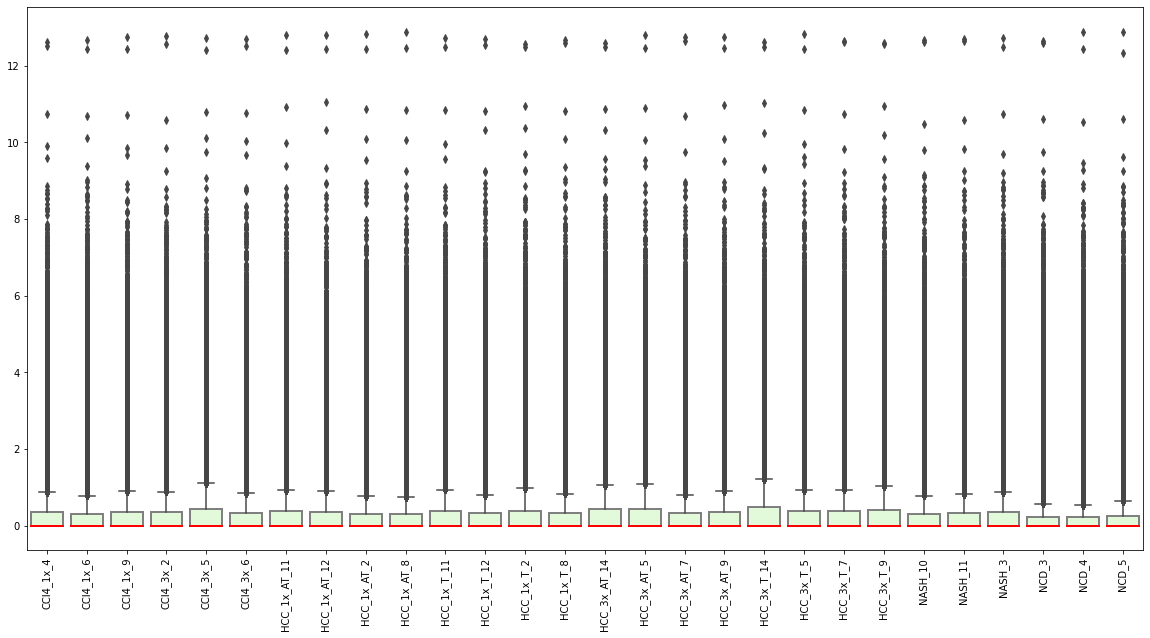

In [80]:
log_tpm = np.log(tpm+1)
#plt.ylim([0, 1])
plt.figure(figsize=(20, 10))
plt.xticks(rotation=90)
boxpl = sns.boxplot(data=log_tpm,
                    boxprops={'edgecolor':'grey', 'facecolor': '#E3FADA', 'linewidth':2},
                    medianprops={'color':'red', 'linewidth':2});

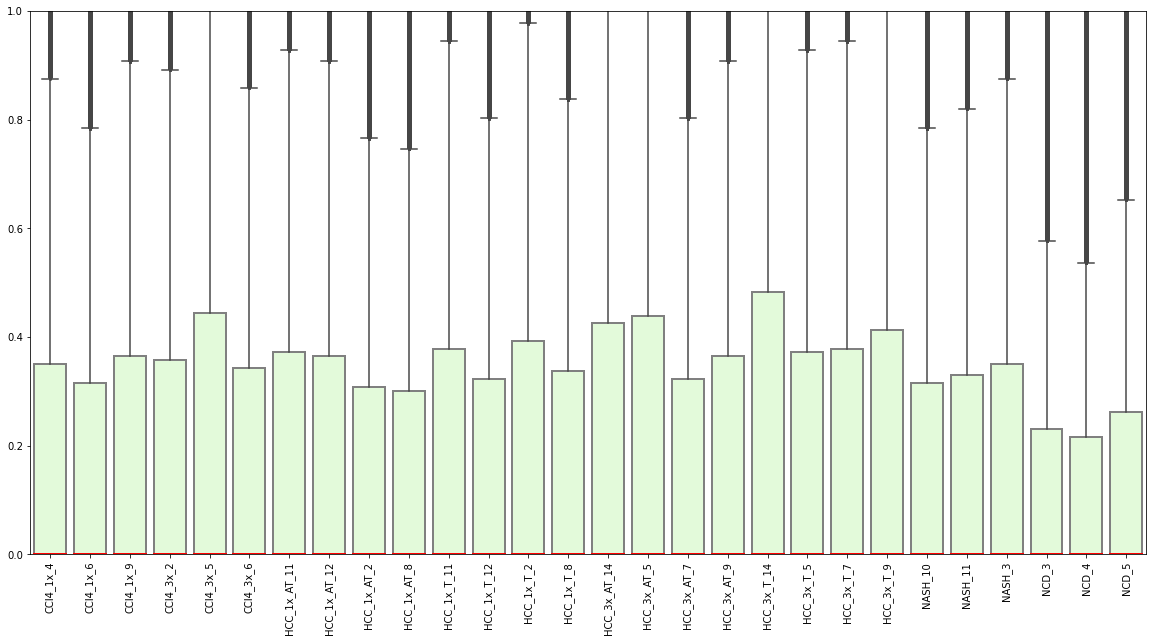

In [81]:
plt.figure(figsize=(20, 10))
plt.ylim([-0.0001, 1])
plt.xticks(rotation=90)
boxpl = sns.boxplot(data=log_tpm,
                    boxprops={'edgecolor':'grey', 'facecolor': '#E3FADA', 'linewidth':2},
                    medianprops={'color':'red', 'linewidth':2})

In [82]:
tpm.sum()  # df.sum() : sum column-wise -> sum of columns in TPM data should be all equal as 1e6

CCI4_1x_4       1000000.60
CCI4_1x_6        999999.22
CCI4_1x_9       1000000.16
CCI4_3x_2        999999.99
CCI4_3x_5       1000000.17
CCI4_3x_6       1000000.56
HCC_1x_AT_11     999999.58
HCC_1x_AT_12    1000000.21
HCC_1x_AT_2     1000000.20
HCC_1x_AT_8     1000000.46
HCC_1x_T_11     1000000.01
HCC_1x_T_12      999999.91
HCC_1x_T_2       999999.60
HCC_1x_T_8      1000000.06
HCC_3x_AT_14     999999.64
HCC_3x_AT_5      999999.74
HCC_3x_AT_7     1000000.97
HCC_3x_AT_9      999999.75
HCC_3x_T_14     1000000.26
HCC_3x_T_5      1000000.11
HCC_3x_T_7      1000000.33
HCC_3x_T_9       999999.86
NASH_10          999998.52
NASH_11         1000000.21
NASH_3          1000000.97
NCD_3            999999.67
NCD_4            999999.72
NCD_5            999999.49
dtype: float64

<AxesSubplot:>

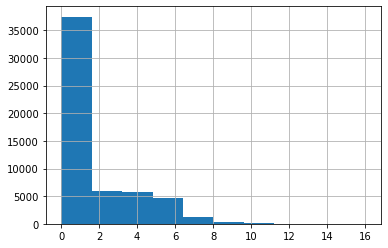

In [83]:
np.log(tpm.sum(axis=1)+1).hist()  # count 0 has extremely large portion (low counts exist)

<AxesSubplot:>

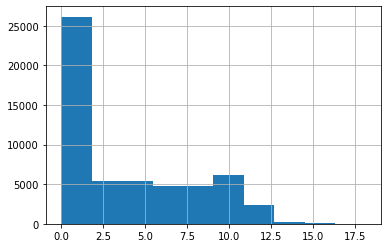

In [84]:
np.log(cnt.sum(axis=1)+1).hist()  # Large 0 counts can also be shown in raw count data (expected count data from RSEM)

#### Let's remove low expressed reads and apply MAD filter

In [85]:
from statsmodels.robust import mad

In [86]:
cnt_filtered = cnt[(cnt > 15).sum(axis=1) >= 3]

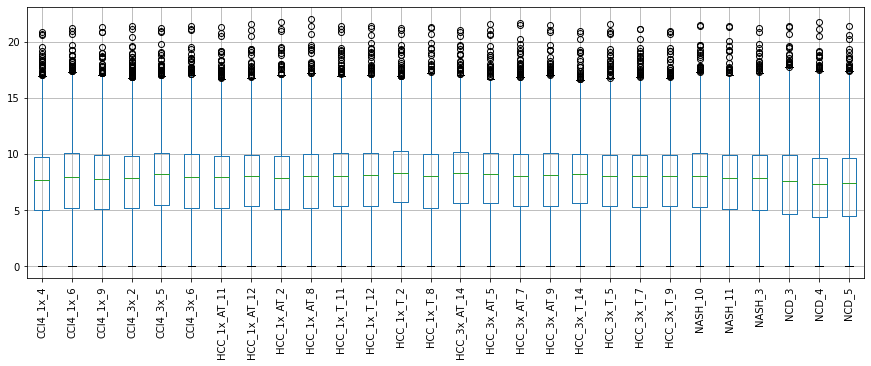

In [87]:
np.log2(cnt_filtered + 1).boxplot(figsize=(15, 5))
plt.xticks(rotation=90);

In [88]:
def MADFilter(cnt_df):
    crit_p = cnt_df.median() + 3*mad(cnt_df)
    crit_n = cnt_df.median() - 3*mad(cnt_df)
    
    return cnt_df[((cnt_df >= crit_n) & (cnt_df <= crit_p)).sum(axis=1) == 28]

In [89]:
cf_mad = MADFilter(cnt_filtered)

In [90]:
cnt_filtered.describe()

,CCI4_1x_4,CCI4_1x_6,CCI4_1x_9,CCI4_3x_2,CCI4_3x_5,CCI4_3x_6,HCC_1x_AT_11,HCC_1x_AT_12,HCC_1x_AT_2,HCC_1x_AT_8,...,HCC_3x_T_14,HCC_3x_T_5,HCC_3x_T_7,HCC_3x_T_9,NASH_10,NASH_11,NASH_3,NCD_3,NCD_4,NCD_5
count,1.898300e+04,1.898300e+04,1.898300e+04,1.898300e+04,1.898300e+04,1.898300e+04,1.898300e+04,1.898300e+04,1.898300e+04,1.898300e+04,...,1.898300e+04,1.898300e+04,1.898300e+04,1.898300e+04,1.898300e+04,1.898300e+04,1.898300e+04,1.898300e+04,1.898300e+04,1.898300e+04
mean,1.917576e+03,2.329600e+03,2.056055e+03,2.020944e+03,2.039345e+03,2.145668e+03,1.838291e+03,1.933553e+03,1.993923e+03,2.186586e+03,...,1.820911e+03,1.951955e+03,1.864995e+03,1.863625e+03,2.202103e+03,1.886818e+03,1.846243e+03,2.309822e+03,1.992077e+03,1.831589e+03
std,2.528986e+04,3.009159e+04,2.993573e+04,3.133708e+04,2.993314e+04,3.273889e+04,2.743728e+04,3.196166e+04,3.549164e+04,4.118311e+04,...,2.427593e+04,3.436834e+04,2.763097e+04,2.622136e+04,3.295471e+04,3.099355e+04,2.624866e+04,3.301569e+04,3.424236e+04,2.742862e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.000000e+01,3.464000e+01,3.300000e+01,3.500000e+01,4.229500e+01,3.600000e+01,3.600000e+01,3.893000e+01,3.200000e+01,3.600000e+01,...,4.755000e+01,4.000000e+01,3.700000e+01,4.000000e+01,3.800000e+01,3.200000e+01,3.100000e+01,2.400000e+01,2.000000e+01,2.100000e+01
50%,2.000000e+02,2.450000e+02,2.200000e+02,2.260000e+02,2.890000e+02,2.480700e+02,2.381500e+02,2.570000e+02,2.340000e+02,2.600000e+02,...,2.857300e+02,2.611500e+02,2.529200e+02,2.620000e+02,2.659400e+02,2.280000e+02,2.350000e+02,1.910000e+02,1.580000e+02,1.670000e+02
75%,8.660000e+02,1.056000e+03,9.490700e+02,9.090000e+02,1.068480e+03,9.911500e+02,9.168800e+02,9.617550e+02,9.210050e+02,1.024000e+03,...,1.031780e+03,9.616750e+02,9.485000e+02,9.710000e+02,1.102000e+03,9.303750e+02,9.580000e+02,9.467300e+02,7.825000e+02,7.850000e+02
max,1.921278e+06,2.479710e+06,2.574762e+06,2.832191e+06,2.506701e+06,2.718491e+06,2.580479e+06,3.111652e+06,3.430145e+06,4.260763e+06,...,2.040568e+06,3.120287e+06,2.286011e+06,1.967956e+06,2.886096e+06,2.732543e+06,2.455585e+06,2.710201e+06,3.485479e+06,2.774562e+06


In [91]:
cf_mad.describe()

,CCI4_1x_4,CCI4_1x_6,CCI4_1x_9,CCI4_3x_2,CCI4_3x_5,CCI4_3x_6,HCC_1x_AT_11,HCC_1x_AT_12,HCC_1x_AT_2,HCC_1x_AT_8,...,HCC_3x_T_14,HCC_3x_T_5,HCC_3x_T_7,HCC_3x_T_9,NASH_10,NASH_11,NASH_3,NCD_3,NCD_4,NCD_5
count,13587.000000,13587.000000,13587.000000,13587.000000,13587.000000,13587.000000,13587.000000,13587.000000,13587.000000,13587.000000,...,13587.000000,13587.000000,13587.000000,13587.000000,13587.000000,13587.000000,13587.000000,13587.000000,13587.000000,13587.000000
mean,170.235048,205.996403,188.825771,189.711853,231.438011,202.798676,191.571459,206.224104,190.937846,213.064845,...,229.433876,212.667383,200.369280,206.890601,220.038910,188.367393,194.971366,173.691182,145.363520,147.586797
std,209.747225,254.751875,235.604639,231.388062,275.987474,244.839010,226.912021,242.856117,231.548752,259.715730,...,264.326336,252.379324,235.995922,240.225681,267.977304,229.927109,240.517881,227.827574,193.118737,191.200187
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,20.000000,19.000000,21.000000,24.355000,21.000000,21.000000,22.000000,18.000000,20.000000,...,27.385000,23.000000,22.000000,23.000000,22.000000,18.520000,18.000000,13.765000,10.000000,12.000000
50%,70.000000,82.000000,75.000000,81.000000,103.740000,85.000000,85.000000,93.000000,80.000000,91.000000,...,113.000000,97.000000,89.480000,95.000000,92.750000,77.020000,76.000000,60.000000,48.740000,52.000000
75%,260.335000,314.000000,286.000000,293.000000,364.020000,320.000000,301.995000,325.000000,302.000000,333.000000,...,358.765000,331.000000,315.830000,328.000000,339.000000,295.000000,305.000000,258.000000,218.000000,225.000000
max,1041.000000,1284.000000,1148.000000,1159.000000,1503.000000,1290.000000,1178.000000,1311.000000,1202.000000,1359.000000,...,1463.470000,1354.850000,1291.000000,1300.000000,1380.000000,1160.750000,1233.000000,1013.000000,851.000000,889.000000


In [92]:
def CalculateTPM(cnt_df: pd.DataFrame, len_df: pd.DataFrame) -> pd.DataFrame:
    common_idx = set(cnt_df.index) & set(len_df.index)
    cnt = cnt_df.loc[list(common_idx), :]
    length = len_df.loc[list(common_idx)]

    rpk = cnt.div(length.values, axis=0) * 1e3
    
    tpm = rpk.div(rpk.sum().values) * 1e6
    
    return tpm

In [93]:
cf_tpm = CalculateTPM(cf_mad, length)

In [94]:
cf_tpm.sum()

CCI4_1x_4       1000000.0
CCI4_1x_6       1000000.0
CCI4_1x_9       1000000.0
CCI4_3x_2       1000000.0
CCI4_3x_5       1000000.0
CCI4_3x_6       1000000.0
HCC_1x_AT_11    1000000.0
HCC_1x_AT_12    1000000.0
HCC_1x_AT_2     1000000.0
HCC_1x_AT_8     1000000.0
HCC_1x_T_11     1000000.0
HCC_1x_T_12     1000000.0
HCC_1x_T_2      1000000.0
HCC_1x_T_8      1000000.0
HCC_3x_AT_14    1000000.0
HCC_3x_AT_5     1000000.0
HCC_3x_AT_7     1000000.0
HCC_3x_AT_9     1000000.0
HCC_3x_T_14     1000000.0
HCC_3x_T_5      1000000.0
HCC_3x_T_7      1000000.0
HCC_3x_T_9      1000000.0
NASH_10         1000000.0
NASH_11         1000000.0
NASH_3          1000000.0
NCD_3           1000000.0
NCD_4           1000000.0
NCD_5           1000000.0
dtype: float64

In [95]:
np.mean((np.log(cf_tpm+1)).quantile(q=0.25)) - 1.5*np.std((np.log(cf_tpm+1)).quantile(q=0.25)), \
np.mean((np.log(cf_tpm+1)).quantile(q=0.25)) + 1.5*np.std((np.log(cf_tpm+1)).quantile(q=0.25))

(1.974135126565278, 2.40056464256996)

In [96]:
np.median((np.log(cf_tpm+1)).quantile(q=0.25)) - 2*mad((np.log(cf_tpm+1)).quantile(q=0.25)), \
np.median((np.log(cf_tpm+1)).quantile(q=0.25)) + 2*mad((np.log(cf_tpm+1)).quantile(q=0.25))

(2.0383517137337974, 2.3911189346915678)

In [97]:
(np.log(cf_tpm+1)).quantile(q=0.25).sort_values(ascending=True)

NCD_4           1.737388
NCD_5           1.896693
NCD_3           1.925373
HCC_1x_AT_2     2.078663
HCC_1x_AT_8     2.081559
NASH_3          2.102293
CCI4_1x_6       2.153058
HCC_1x_T_8      2.156139
NASH_11         2.169484
CCI4_1x_9       2.170590
HCC_3x_AT_7     2.185915
NASH_10         2.199603
CCI4_3x_6       2.208091
HCC_1x_AT_12    2.210717
HCC_3x_AT_9     2.218754
HCC_3x_T_5      2.222207
CCI4_1x_4       2.235466
CCI4_3x_2       2.237120
HCC_1x_T_11     2.247491
CCI4_3x_5       2.247712
HCC_1x_T_12     2.261424
HCC_3x_T_7      2.275108
HCC_1x_AT_11    2.286164
HCC_3x_AT_5     2.286291
HCC_3x_T_9      2.308599
HCC_3x_AT_14    2.358292
HCC_1x_T_2      2.374147
HCC_3x_T_14     2.411455
Name: 0.25, dtype: float64

In [98]:
np.mean((np.log(cf_tpm+1)).median()) - 1.5*np.std((np.log(cf_tpm+1)).median()), \
np.mean((np.log(cf_tpm+1)).median()) + 1.5*np.std((np.log(cf_tpm+1)).median())

(3.278521759342721, 3.5325499899825092)

In [99]:
np.median((np.log(cf_tpm+1)).median()) - 2*mad((np.log(cf_tpm+1)).median()), \
np.median((np.log(cf_tpm+1)).median()) + 2*mad((np.log(cf_tpm+1)).median())

(3.270782503787262, 3.5742510218044563)

In [100]:
(np.log(cf_tpm+1)).median().sort_values(ascending=True)

NCD_4           3.175533
NCD_3           3.228177
NCD_5           3.238397
NASH_10         3.352824
NASH_3          3.353147
CCI4_1x_6       3.354714
HCC_1x_AT_8     3.365320
HCC_1x_AT_2     3.365562
HCC_1x_T_8      3.372814
NASH_11         3.379584
CCI4_1x_9       3.390579
CCI4_3x_6       3.392681
CCI4_1x_4       3.408695
HCC_3x_AT_7     3.417405
HCC_3x_T_7      3.427628
HCC_1x_T_12     3.432505
HCC_3x_T_5      3.433470
HCC_1x_T_11     3.435427
CCI4_3x_2       3.439770
HCC_3x_AT_9     3.444704
HCC_1x_AT_12    3.451117
HCC_1x_AT_11    3.461379
CCI4_3x_5       3.475157
HCC_1x_T_2      3.489328
HCC_3x_T_9      3.495806
HCC_3x_AT_5     3.506562
HCC_3x_AT_14    3.509166
HCC_3x_T_14     3.557553
dtype: float64

In [101]:
np.mean((np.log(cf_tpm+1)).quantile(q=0.75)) - 1.5*np.std((np.log(cf_tpm+1)).quantile(q=0.75)), \
np.mean((np.log(cf_tpm+1)).quantile(q=0.75)) + 1.5*np.std((np.log(cf_tpm+1)).quantile(q=0.75))

(4.535098324629187, 4.611568152756359)

In [102]:
np.median((np.log(cf_tpm+1)).quantile(q=0.75)) - 2*mad((np.log(cf_tpm+1)).quantile(q=0.75)), \
np.median((np.log(cf_tpm+1)).quantile(q=0.75)) + 2*mad((np.log(cf_tpm+1)).quantile(q=0.75))

(4.524090412208158, 4.630400847107163)

In [103]:
(np.log(cf_tpm+1)).quantile(q=0.75).sort_values(ascending=True)

NCD_3           4.515844
NCD_4           4.523787
NCD_5           4.541687
HCC_1x_AT_2     4.541859
HCC_1x_AT_8     4.544245
CCI4_1x_6       4.548766
HCC_3x_T_5      4.553936
CCI4_1x_4       4.559484
NASH_10         4.560022
HCC_1x_T_8      4.562117
HCC_3x_AT_7     4.563477
CCI4_3x_6       4.566608
HCC_1x_T_12     4.573687
HCC_1x_T_11     4.575792
HCC_1x_AT_12    4.578699
HCC_1x_T_2      4.580091
CCI4_1x_9       4.582613
NASH_11         4.584052
NASH_3          4.586036
HCC_3x_AT_9     4.587349
CCI4_3x_2       4.593956
HCC_3x_T_7      4.595337
CCI4_3x_5       4.597383
HCC_3x_AT_5     4.602696
HCC_3x_T_9      4.604055
HCC_3x_AT_14    4.605541
HCC_3x_T_14     4.611640
HCC_1x_AT_11    4.612571
Name: 0.75, dtype: float64

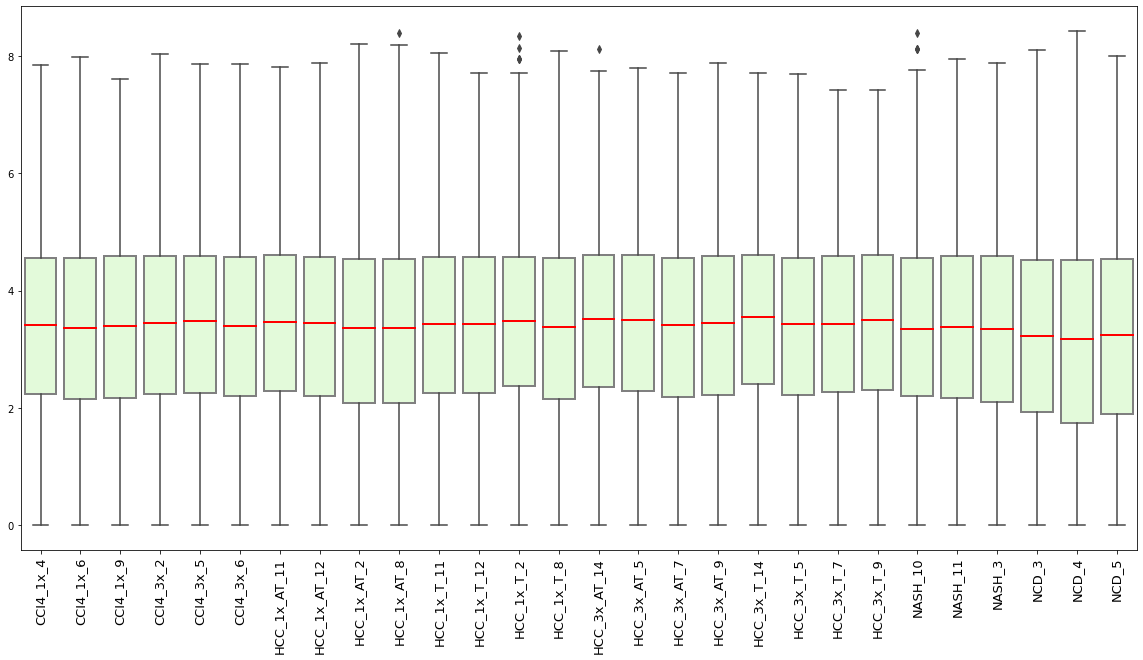

In [104]:
plt.figure(figsize=(20, 10))
#plt.ylim([3.7, 7.2])
plt.xticks(rotation=90, fontsize=13)
boxpl = sns.boxplot(data = np.log(cf_tpm+1), 
                    boxprops={'edgecolor':'grey', 'facecolor': '#E3FADA', 'linewidth':2},
                    medianprops={'color':'red', 'linewidth':2});

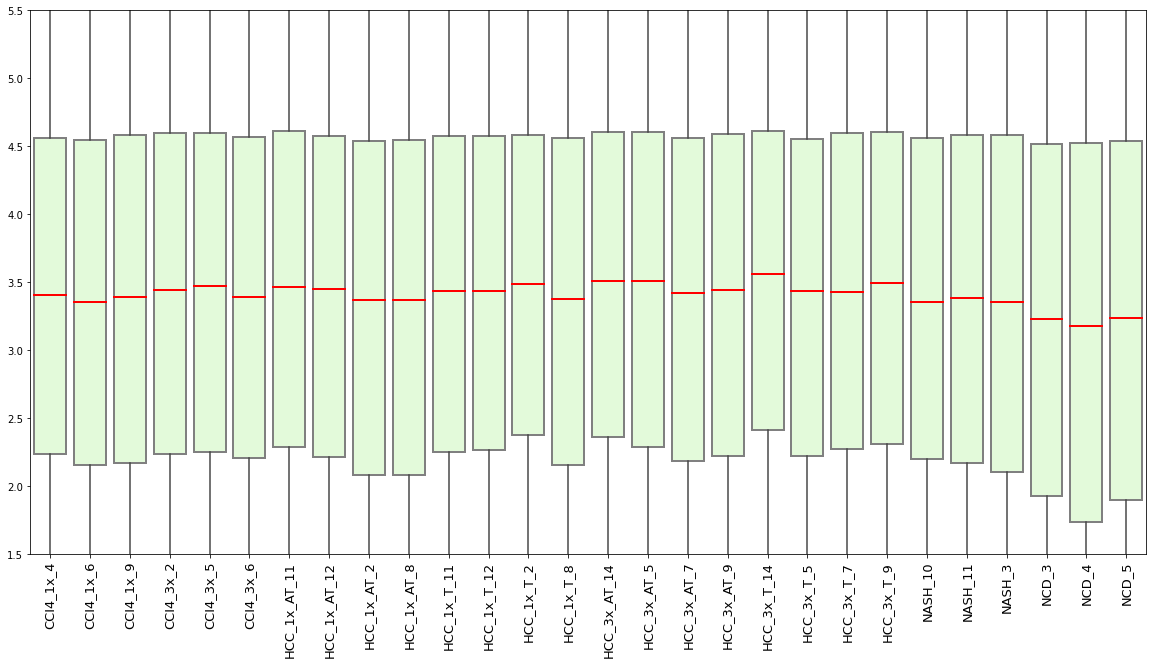

In [106]:
plt.figure(figsize=(20, 10))
plt.ylim([1.5, 5.5])
plt.xticks(rotation=90, fontsize=13)
boxpl = sns.boxplot(data = np.log(cf_tpm+1), 
                    boxprops={'edgecolor':'grey', 'facecolor': '#E3FADA', 'linewidth':2},
                    medianprops={'color':'red', 'linewidth':2});

In [41]:
def MakeBoxplot(data: pd.DataFrame) -> None:
    #mean_median = np.mean(np.log(data+1).median())
    #std_median = np.std(np.log(data+1).median())
    med_median = np.median(np.log(data+1).median())
    mad_median = mad(np.log(data+1).median())

    #mean_q75 = np.mean(np.log(data+1).quantile(q=0.75))
    #std_q75 = np.std(np.log(data+1).quantile(q=0.75))
    med_q75 = np.median(np.log(data+1).quantile(q=0.75))
    mad_q75 = mad(np.log(data+1).quantile(q=0.75))

    #mean_q25 = np.mean(np.log(data+1).quantile(q=0.25))
    #std_q25 = np.std(np.log(data+1).quantile(q=0.25))
    med_q25 = np.median(np.log(data+1).quantile(q=0.25))
    mad_q25 = mad(np.log(data+1).quantile(q=0.25))

    plt.figure(figsize=(20, 10))
    plt.ylim([1.5, 5.5])
    plt.ylabel("log(TPM+1)", fontsize=18)
    plt.xticks(rotation=90, fontsize=15)
    
    sns.boxplot(data = np.log(data+1), 
                boxprops={'edgecolor':'grey', 'facecolor': '#E3FADA', 'linewidth':2},
                medianprops={'color':'black', 'linewidth':2})

    #plt.axhline(mean_median, color='red', linewidth=2)
    #plt.axhline(mean_median + 1.5*std_median, color='blue', linewidth=2, linestyle='--')
    #plt.axhline(mean_median - 1.5*std_median, color='blue', linewidth=2, linestyle='--')

    plt.axhline(med_median, color='red', linewidth=2)
    plt.axhline(med_median + 2*mad_median, color='blue', linewidth=2, linestyle='--')
    plt.axhline(med_median - 2*mad_median, color='blue', linewidth=2, linestyle='--')

    #plt.axhline(mean_q75, color='red', linewidth=2)
    #plt.axhline(mean_q75 + 1.5*std_q75, color='blue', linewidth=2, linestyle='--')
    #plt.axhline(mean_q75 - 1.5*std_q75, color='blue', linewidth=2, linestyle='--')

    plt.axhline(med_q75, color='red', linewidth=2)
    plt.axhline(med_q75 + 2*mad_q75, color='blue', linewidth=2, linestyle='--')
    plt.axhline(med_q75 - 2*mad_q75, color='blue', linewidth=2, linestyle='--')

    #plt.axhline(mean_q25, color='red', linewidth=2)
    #plt.axhline(mean_q25 + 1.5*std_q25, color='blue', linewidth=2, linestyle='--')
    #plt.axhline(mean_q25 - 1.5*std_q25, color='blue', linewidth=2, linestyle='--')

    plt.axhline(med_q25, color='red', linewidth=2)
    plt.axhline(med_q25 + 2*mad_q25, color='blue', linewidth=2, linestyle='--')
    plt.axhline(med_q25 - 2*mad_q25, color='blue', linewidth=2, linestyle='--')

    plt.show()

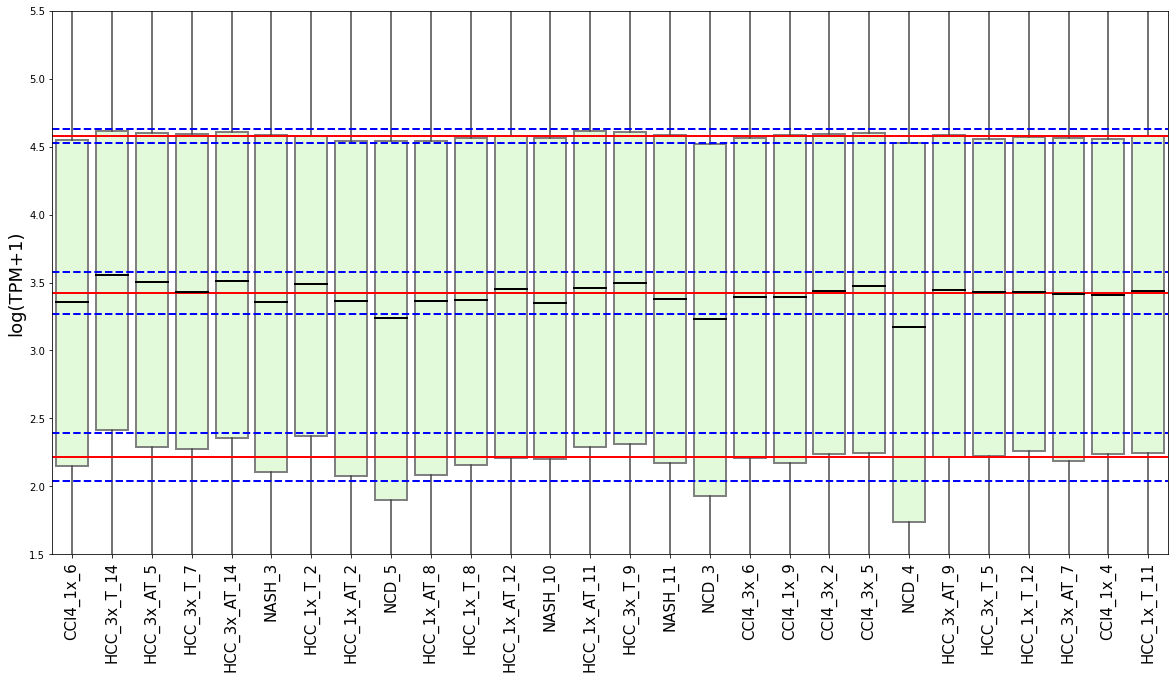

In [42]:
MakeBoxplot(cf_tpm)

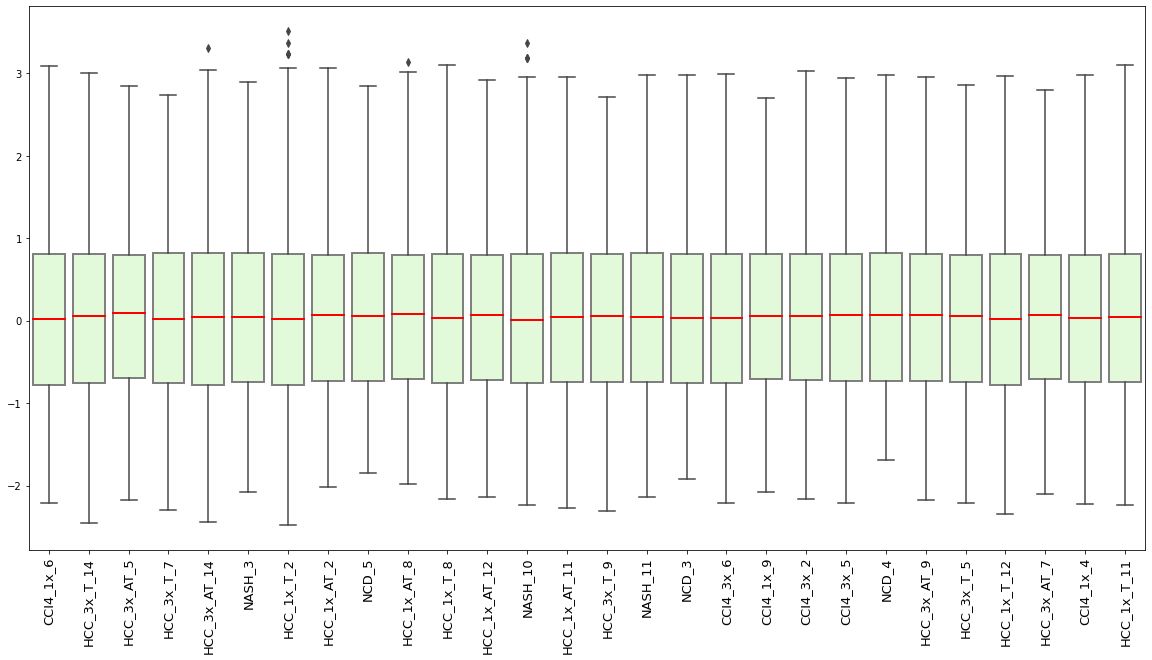

In [43]:
plt.figure(figsize=(20, 10))
#plt.ylim([1.5, 5.5])
plt.xticks(rotation=90, fontsize=13)
boxpl = sns.boxplot(data = (np.log(cf_tpm+1) - np.log(cf_tpm+1).mean()) / np.log(cf_tpm+1).std(), 
                    boxprops={'edgecolor':'grey', 'facecolor': '#E3FADA', 'linewidth':2},
                    medianprops={'color':'red', 'linewidth':2});

### Multi-Dimensional Scaling (MDS)

In [44]:
from sklearn.decomposition import PCA

In [46]:
def MakePCA(data: pd.DataFrame) -> None:
    pca = PCA(n_components=2)
    pca_data = pca.fit_transform(data.transpose())
    pc_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])
    pc_df['sample'] = ['_'.join(x.split('_')[:-1]) for x in data.columns]
    pc_df['group'] = [x.split('_')[0] for x in data.columns]

    plt.figure(figsize=(20, 10))
    plt.xlabel("PC1", size=18)
    plt.ylabel("PC2", size=18)

    sns.scatterplot(data=pc_df, x='PC1', y='PC2', hue='group', style='sample', s=300);
    plt.legend(bbox_to_anchor=(1.005, 1), loc='upper left', borderaxespad=0, fontsize=15);

    plt.show()

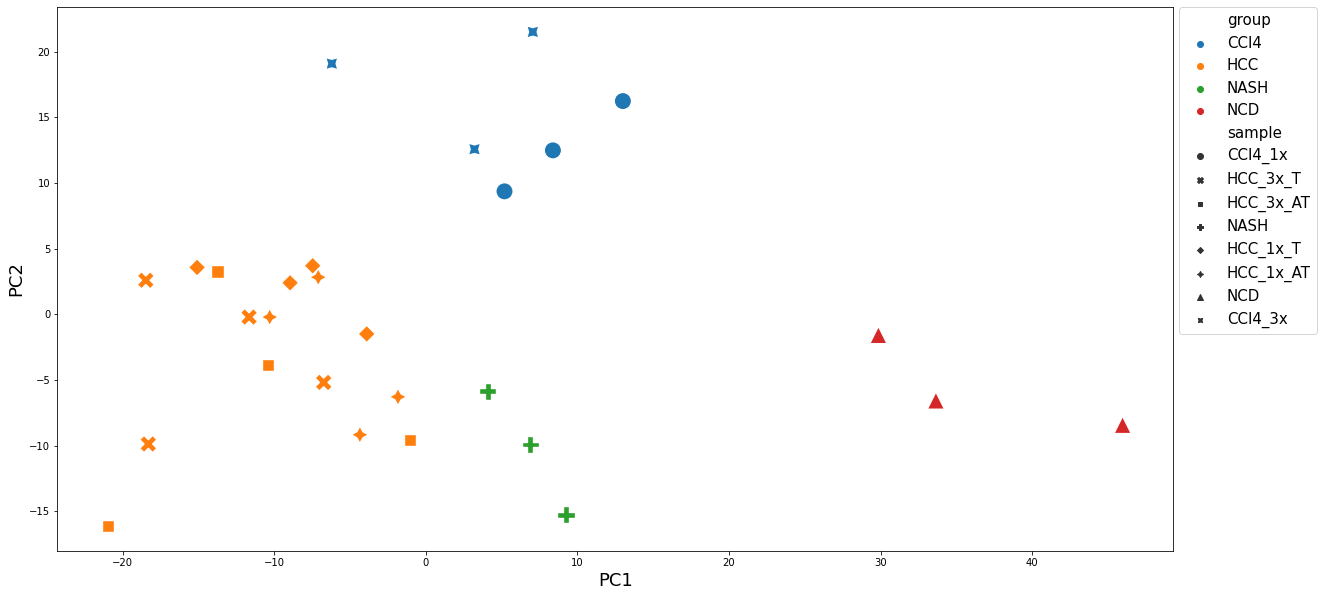

In [47]:
cnt_z = (np.log(cnt+1) - np.log(cnt+1).mean()) / np.log(cnt+1).std()  # PCA with non-filtered original count data
MakePCA(cnt_z)

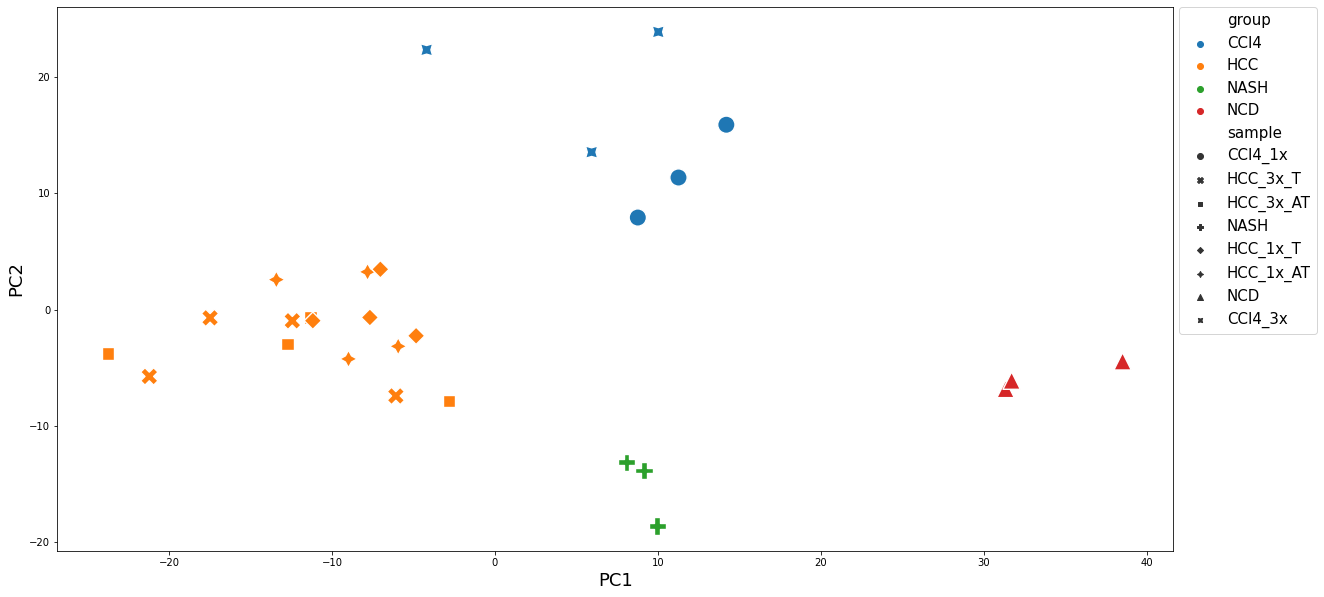

In [48]:
cf_z = (np.log(cnt_filtered+1) - np.log(cnt_filtered+1).mean()) / np.log(cnt_filtered+1).std()  # PCA with low-expressed gene trimmed count data
MakePCA(cf_z)

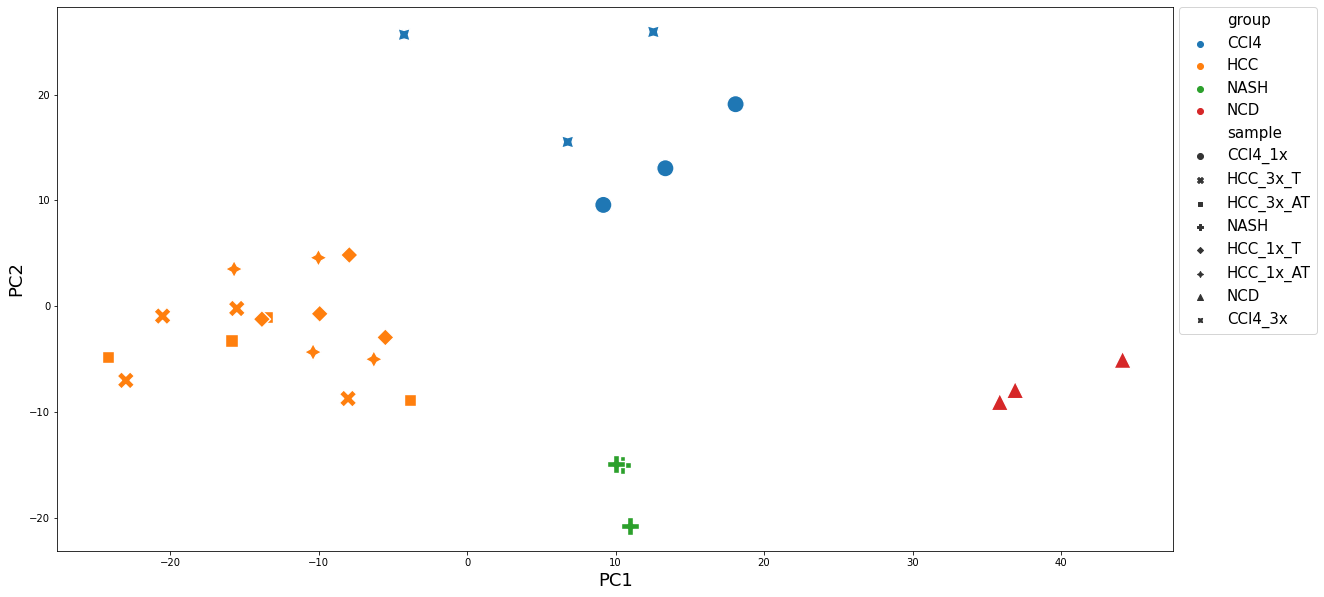

In [49]:
cf_mad_z = (np.log(cf_mad+1) - np.log(cf_mad+1).mean()) / np.log(cf_mad+1).std()  # PCA with low-expressed gene trimmed and MAD filtered count data
MakePCA(cf_mad_z)

In [50]:
def FindHighVariable(data: pd.DataFrame) -> pd.DataFrame:
    df_mean = data.mean(axis=1)
    df_std = data.std(axis=1)
    cv = df_mean.div(df_std).sort_values(ascending=False)
    
    return data.loc[cv.index[:round(len(cv)*0.25+1)], :]

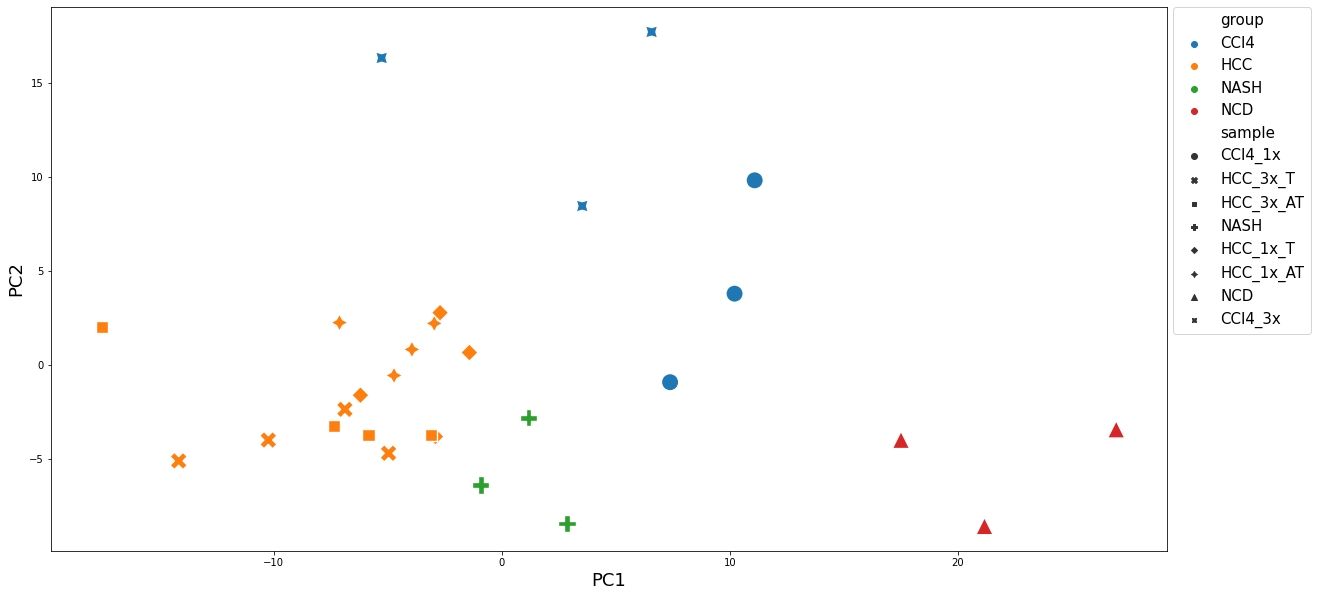

In [51]:
cnt_hv = FindHighVariable(cnt)
cnt_hv_z = (np.log(cnt_hv+1) - np.log(cnt_hv+1).mean()) / np.log(cnt_hv+1).std()

MakePCA(cnt_hv_z)

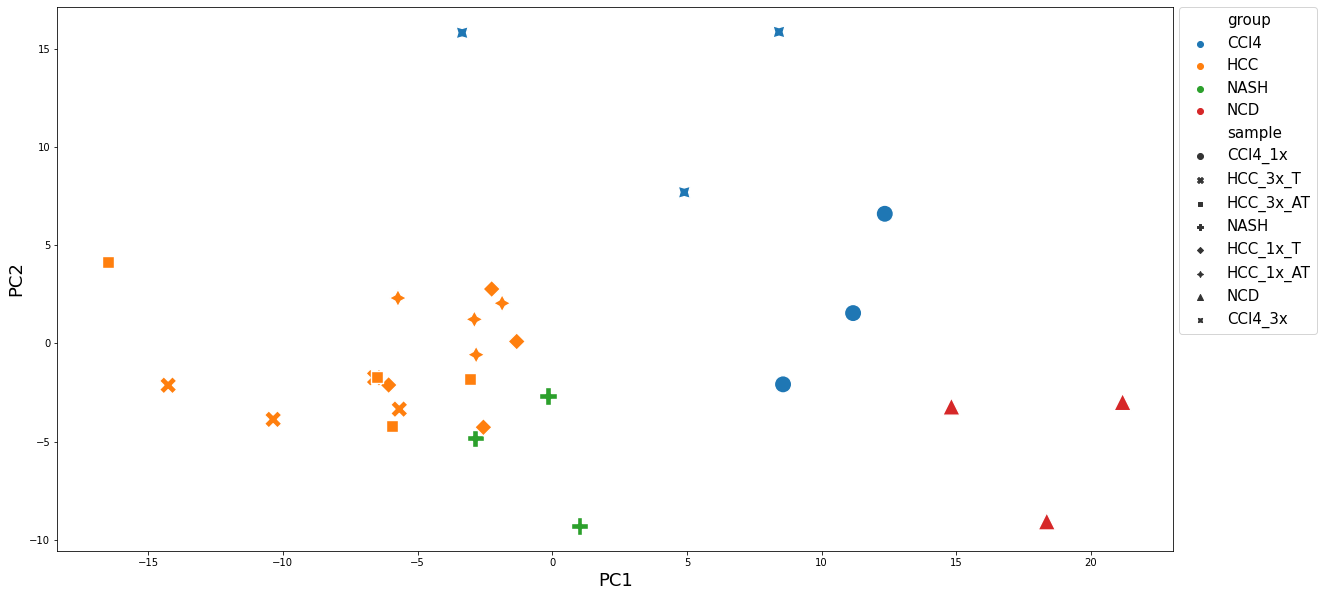

In [52]:
cnt_hv_tpm = CalculateTPM(cnt_hv, length)
cnt_hv_tpm_z = (np.log(cnt_hv_tpm+1) - np.log(cnt_hv_tpm+1).mean()) / np.log(cnt_hv_tpm+1).std()
MakePCA(cnt_hv_tpm_z)

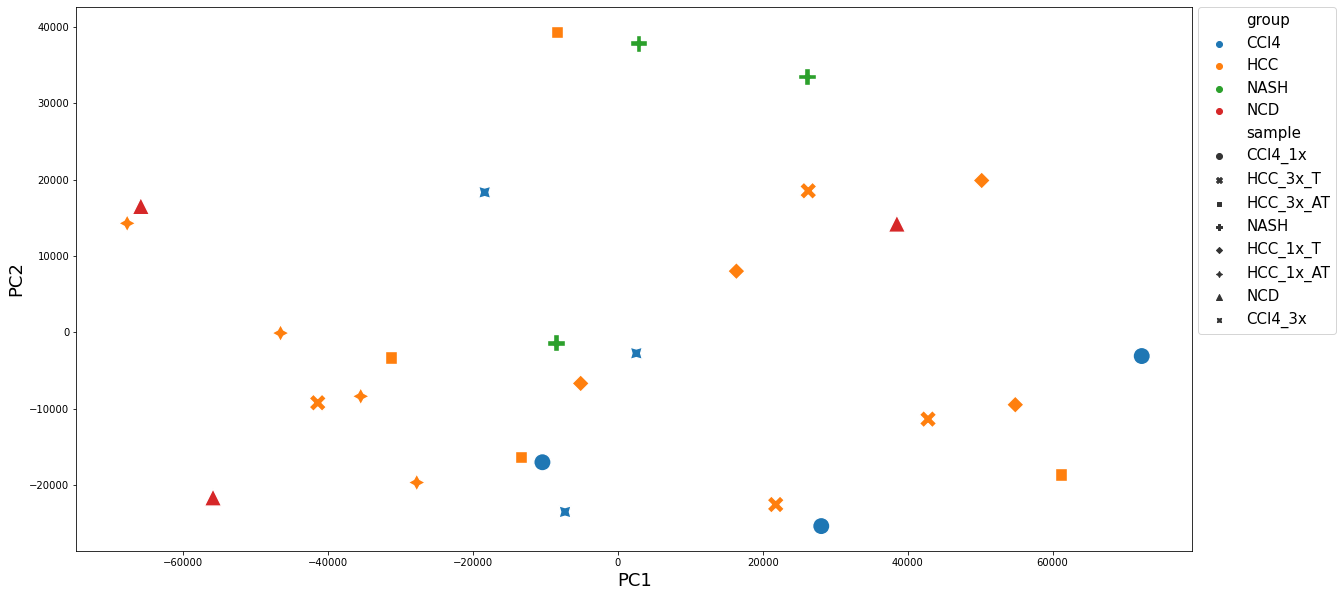

In [53]:
MakePCA(cnt_hv_tpm)

In [54]:
FindHighVariable(np.log2(tpm+1))

,CCI4_1x_6,HCC_3x_T_14,HCC_3x_AT_5,HCC_3x_T_7,HCC_3x_AT_14,NASH_3,HCC_1x_T_2,HCC_1x_AT_2,NCD_5,HCC_1x_AT_8,...,CCI4_1x_9,CCI4_3x_2,CCI4_3x_5,NCD_4,HCC_3x_AT_9,HCC_3x_T_5,HCC_1x_T_12,HCC_3x_AT_7,CCI4_1x_4,HCC_1x_T_11
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSMUSG00000118841.1,18.262808,18.017030,17.983141,18.238559,18.159672,18.017552,18.145953,17.945459,17.778927,17.964369,...,17.957599,18.111659,17.921548,17.956525,17.962592,17.930957,18.313717,18.249715,18.040008,18.034824
ENSMUSG00000037742.15,10.766289,10.976736,10.815143,10.755505,10.849436,11.055967,10.657711,10.808457,10.991798,10.688320,...,10.888249,10.689579,10.771176,10.741543,10.922250,10.874159,10.792538,10.751167,10.811206,10.675543
ENSMUSG00000118866.1,17.947422,18.215703,18.463865,18.216497,18.010040,18.352050,18.006682,18.517433,18.567672,18.598383,...,18.381501,18.411517,18.346644,18.579932,18.392762,18.516340,18.097973,18.388910,18.211727,18.356535
ENSMUSG00002076161.1,15.423816,15.904901,15.735727,15.498941,15.673386,15.509659,15.800276,15.701071,15.317448,15.636047,...,15.454986,15.275976,15.580128,15.180344,15.819673,15.649761,15.606625,15.416011,15.512806,15.630149
ENSMUSG00000024038.18,6.173327,6.183685,6.263410,6.157650,6.166515,6.045923,6.235153,6.158458,6.069101,6.065443,...,5.970624,6.200653,6.036284,6.308157,6.218587,6.114159,6.094025,6.242793,6.056367,6.227664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000043448.14,0.189034,0.704872,0.411426,0.263034,0.485427,0.432959,0.367371,0.238787,0.111031,0.356144,...,0.400538,0.310340,0.411426,0.056584,0.411426,0.250962,0.367371,0.263034,0.333424,0.495695
ENSMUSG00000030319.9,0.163499,0.310340,0.344828,0.286881,0.321928,0.201634,0.378512,0.201634,0.111031,0.310340,...,0.137504,0.310340,0.286881,0.000000,0.286881,0.214125,0.176323,0.137504,0.176323,0.378512
ENSMUSG00000090936.3,0.124328,0.356144,0.344828,0.333424,0.275007,0.275007,0.163499,0.056584,0.097611,0.238787,...,0.150560,0.298658,0.201634,0.111031,0.275007,0.226509,0.176323,0.298658,0.250962,0.321928


In [55]:
def CalculateTPM(cnt_df: pd.DataFrame, len_df: pd.DataFrame) -> pd.DataFrame:
    common_idx = set(cnt_df.index) & set(len_df.index)
    cnt = cnt_df.loc[list(common_idx), :]
    length = len_df.loc[list(common_idx)]

    rpk = cnt.div(length.values, axis=0) * 1e3
    
    tpm = rpk.div(rpk.sum().values)
    
    return tpm

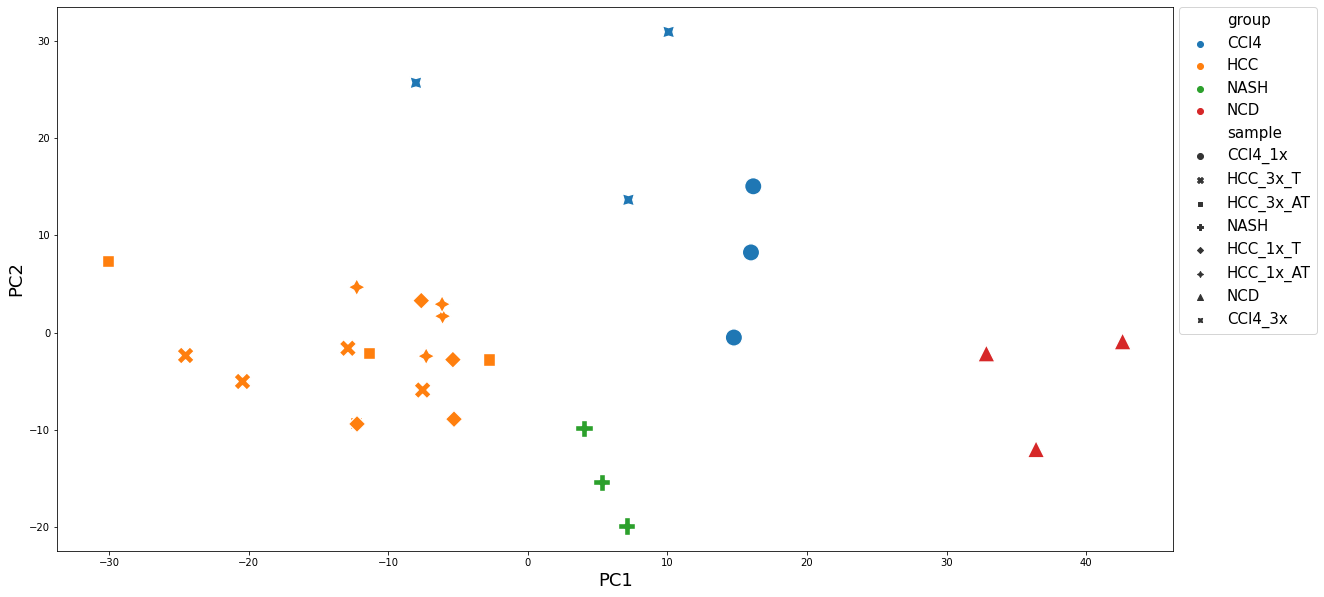

In [56]:
fpkm_z = (np.log(fpkm+1) - np.log(fpkm+1).mean()) / np.log(fpkm+1).std()
MakePCA(fpkm_z)

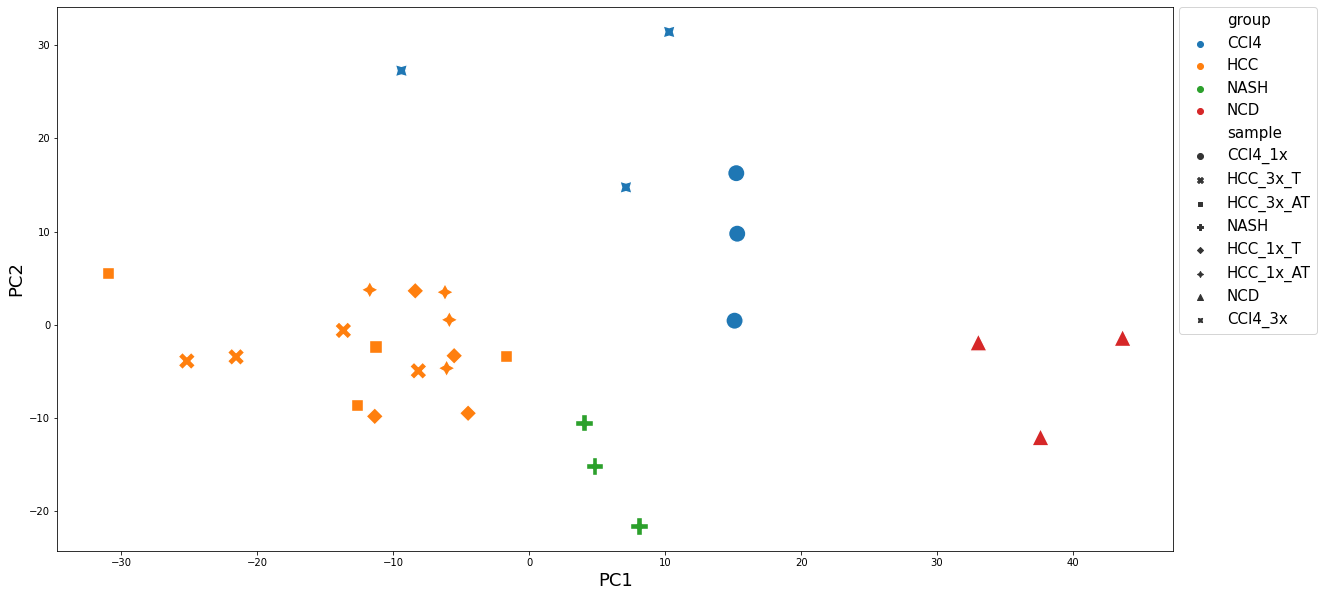

In [57]:
tpm_z = (np.log(tpm+1) - np.log(tpm+1).mean()) / np.log(tpm+1).std()
MakePCA(tpm_z)

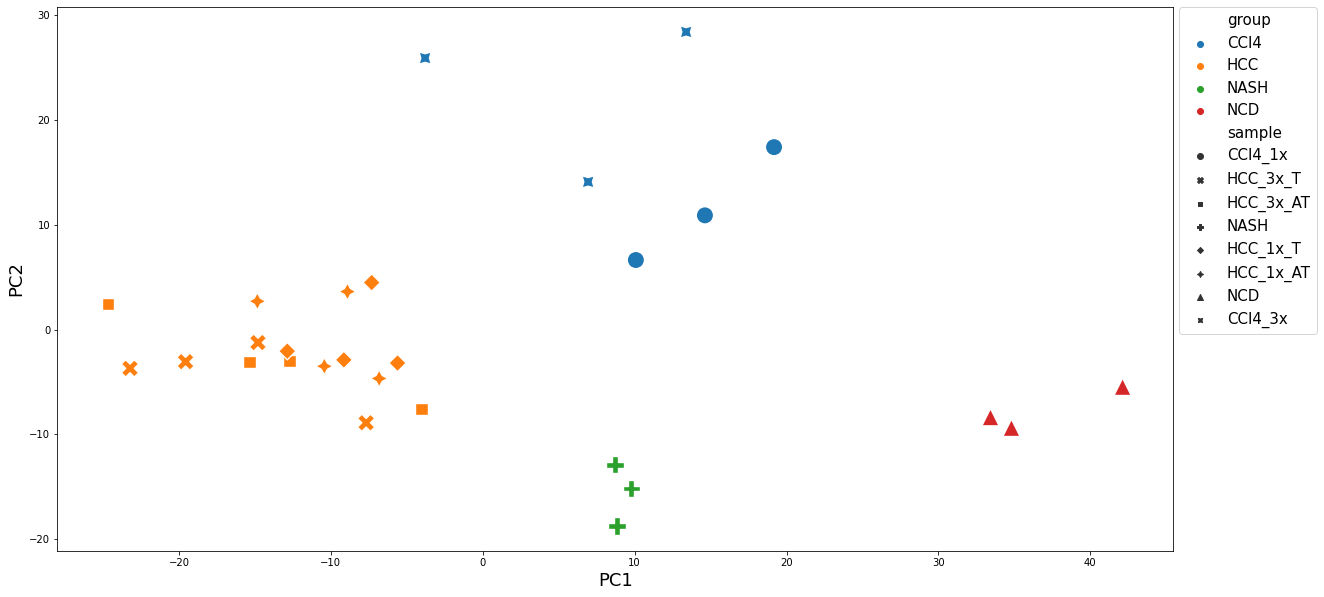

In [58]:
cf_tpm_z = (np.log(cf_tpm+1) - np.log(cf_tpm+1).mean()) / np.log(cf_tpm+1).std()
MakePCA(cf_tpm_z)